Brave search: simple gradient tape model<br>
https://www.linkedin.com/pulse/gradient-tape-deploy-descent-tensorflow-vu-hong-quan<br>
https://github.com/quanvu0996/data_science/blob/main/tf/gradient_tape1_en.ipynb<br>
https://keras.io/examples/generative/neural_style_transfer/

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

Generate dataset: 10 points near y=x

In [9]:
x = np.arange(10)
print(x)

# y=x+np.random.randint(10)
# print(y)

rng=np.random.default_rng(10)
y=x+3*rng.random(10)-1.5
print(y)

m_fit,b_fit = np.polyfit(x, y, 1)

# m,b=1,0
print(m_fit,b_fit)

[0 1 2 3 4 5 6 7 8 9]
[ 1.36800513  0.12304543  2.98533466  1.94784637  4.03841385  3.90775881
  6.56710944  8.02524317  7.77652699 10.37077801]
1.051672749246733 -0.02152118556824941


In [10]:
def make_plot(number, X, Y, a, b):
    plt.scatter(X, Y, color='purple')
    plt.plot(X, a*X+b, color='steelblue', linestyle='--', linewidth=2)

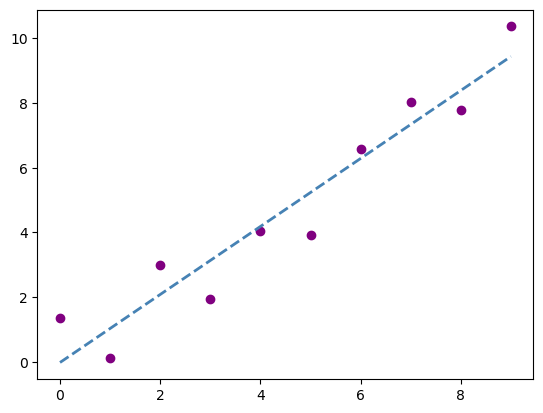

In [11]:
make_plot(0,x,y,m_fit,b_fit)

In [12]:
# Define the loss function
def compute_loss(y_true, m,b):
    y_pred=m*x+b
    # print(y_pred)
    loss = tf.reduce_sum(tf.square(y_true - y_pred))
    return loss

In [13]:
print("Loss=",compute_loss(x,1,0).numpy())    
print("Loss=",compute_loss(x,m_fit,b_fit).numpy())    

Loss= 0
Loss= 0.6655171291941702


In [21]:

m = tf.Variable(initial_value=0.0, trainable=True)


model = tf.keras.Sequential([
    tf.keras.layers.Dense( 1, 
    kernel_initializer='zeros', 
    bias_initializer='zeros')
])

optimizer= tf.optimizers.Adam(learning_rate = .07)

iterations = 70

for i in range(1, iterations + 1):
    with tf.GradientTape() as tape:
        loss = compute_loss(y,m,0)
    grads = tape.gradient(loss, m)
    optimizer.apply_gradients([(grads, m)])
    print("Iteration %d: loss=%.2f" % (i, loss))
    print(m)



Iteration 1: loss=321.73
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.06999953>
Iteration 2: loss=281.30
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.13983113>
Iteration 3: loss=243.75
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.20936519>
Iteration 4: loss=209.12
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.2784552>
Iteration 5: loss=177.45
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.34693956>
Iteration 6: loss=148.73
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.414639>
Iteration 7: loss=122.98
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.48135543>
Iteration 8: loss=100.15
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5468731>
Iteration 9: loss=80.20
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6109578>
Iteration 10: loss=63.06
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6733585>
Iteration 11: loss=48.61
<tf.Variable 'Variable:0' shape=() dtype=float32, nu

In [ ]:

m = tf.Variable(initial_value=0.0, trainable=True)
b = tf.Variable(initial_value=1.0, trainable=True)

model = tf.keras.Sequential([
    tf.keras.layers.Dense( 1, 
    kernel_initializer='zeros', 
    bias_initializer='zeros')
])

optimizer= tf.optimizers.Adam(learning_rate = .07)
# optimizer.build(m,b)

iterations = 100

for i in range(1, iterations + 1):
    with tf.GradientTape() as tape:
        # loss = compute_loss(y,m,b_fit)
        loss = compute_loss(y,m,b)
    grads = tape.gradient(loss, m)
    optimizer.apply_gradients([(grads, m)])

    with tf.GradientTape() as tape:
        # loss = compute_loss(y,m,b_fit)
        loss = compute_loss(y,m,b)
    grads = tape.gradient(loss, b)
    optimizer.apply_gradients([(grads, b)])

    print("Iteration %d: loss=%.2f" % (i, loss))
    print(m)